In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True) #mounting my google drive

Mounted at /content/drive


In [4]:
!mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [5]:
!cp /content/drive/MyDrive/KAGGLE_API_CREDENTIALS/kaggle.json ~/.kaggle/kaggle.json

In [6]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d meeraajayakumar/spotify-user-behavior-dataset
#link to dataset: https://www.kaggle.com/datasets/meeraajayakumar/spotify-user-behavior-dataset

In [ ]:
!unzip /content/spotify-user-behavior-dataset.zip

In [9]:
df = pd.read_excel('/content/Spotify_data.xlsx')

In [13]:
df.head()

,Age,Gender,spotify_usage_period,spotify_listening_device,spotify_subscription_plan,premium_sub_willingness,preffered_premium_plan,preferred_listening_content,fav_music_genre,music_time_slot,music_Influencial_mood,music_lis_frequency,music_expl_method,music_recc_rating,pod_lis_frequency,fav_pod_genre,preffered_pod_format,pod_host_preference,preffered_pod_duration,pod_variety_satisfaction
0,20-35,Female,More than 2 years,Smart speakers or voice assistants,Free (ad-supported),Yes,Family Plan-Rs 179/month,Podcast,Melody,Night,Sadness or melancholy,leisure time,Playlists,3,Daily,Comedy,Interview,Both,Both,Ok
1,12-20,Male,More than 2 years,Computer or laptop,Free (ad-supported),Yes,Individual Plan- Rs 119/ month,Podcast,Rap,Afternoon,Social gatherings or parties,Workout session,Playlists,2,Several times a week,Comedy,Interview,Both,None,Satisfied
2,35-60,Others,6 months to 1 year,Smart speakers or voice assistants,Free (ad-supported),Yes,Student Plan-Rs 59/month,Podcast,Pop,Night,Relaxation and stress relief,"Study Hours, While Traveling",Playlists,4,Once a week,Sports,Interview,None,Both,Satisfied
3,20-35,Female,1 year to 2 years,"Smartphone, Smart speakers or voice assistants",Free (ad-supported),No,None,Music,Melody,Night,"Relaxation and stress relief, Social gathering...","Office hours, Workout session, leisure time","recommendations, Playlists",4,Never,None,None,None,None,Ok
4,20-35,Female,1 year to 2 years,Smartphone,Free (ad-supported),No,None,Music,Melody,Night,Relaxation and stress relief,leisure time,"recommendations, Playlists",4,Rarely,Lifestyle and Health,Story telling,Well known individuals,Both,Ok


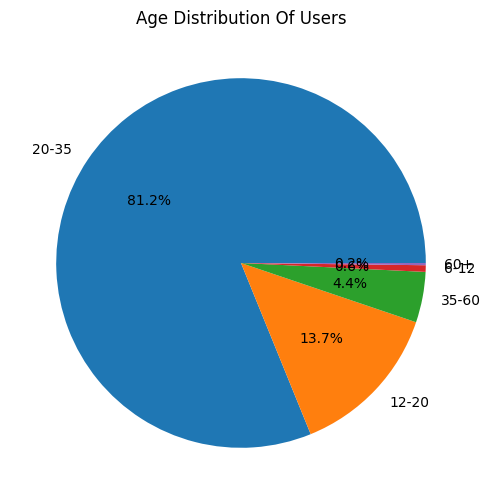

In [70]:
#Showing age distribution of users in pie chart form

# Create a Series with the value counts
age_counts = df['Age'].value_counts()


# Generate the pie chart
plt.figure(figsize=(10,6))
plt.pie(age_counts, labels=age_counts.index, autopct='%1.1f%%')
# age_counts.plot(kind='pie', autopct='%1.1f%%',figsize=(10,6))
plt.title('Age Distribution Of Users')
plt.show()

In [34]:
#Showing age distribution of users in tabular form

# Create a DataFrame from the Series
age_counts_df = age_counts.to_frame()

# Rename the column
age_counts_df.columns = ['Count']

# Calculate the percentage for each age group
age_counts_df['Percentage'] = (age_counts_df['Count'] / age_counts_df['Count'].sum()) * 100
print(age_counts_df)


       Count  Percentage
20-35    422   81.153846
12-20     71   13.653846
35-60     23    4.423077
6-12       3    0.576923
60+        1    0.192308


Based on the age distribution data:

- The majority of the users fall within the age group of 20-35, making up 81.2% of the total user base. This suggests that Spotify is most popular among younger adults.
- The next largest age group is 12-20, accounting for 13.7% of the user base. This indicates that Spotify also has a significant number of teenage users.
- Users aged 35-60 make up a smaller portion of the user base, at just 4.4%. This implies that middle-aged adults use Spotify less frequently than younger adults and teenagers.
- Children (age 6-12) and older adults (60+) represent a very small portion of the user base, at 0.6% and 0.2% respectively. This indicates that Spotify is less popular among these age groups.

The data suggests that Spotify is most popular among younger users, particularly those between the ages of 20 and 35. It may be beneficial for Spotify to focus their marketing and content efforts on this demographic. However, there could also be an opportunity to increase usage among less-represented age groups, such as middle-aged and older adults, by offering more targeted content and features.

Age                   12-20  20-35  35-60  6-12  60+
spotify_usage_period                                
1 year to 2 years      16.3   78.0    4.3   0.7  0.7
6 months to 1 year     24.4   67.2    7.6   0.8  0.0
Less than 6 months      4.4   91.2    4.4   0.0  0.0
More than 2 years       8.9   88.2    2.4   0.6  0.0


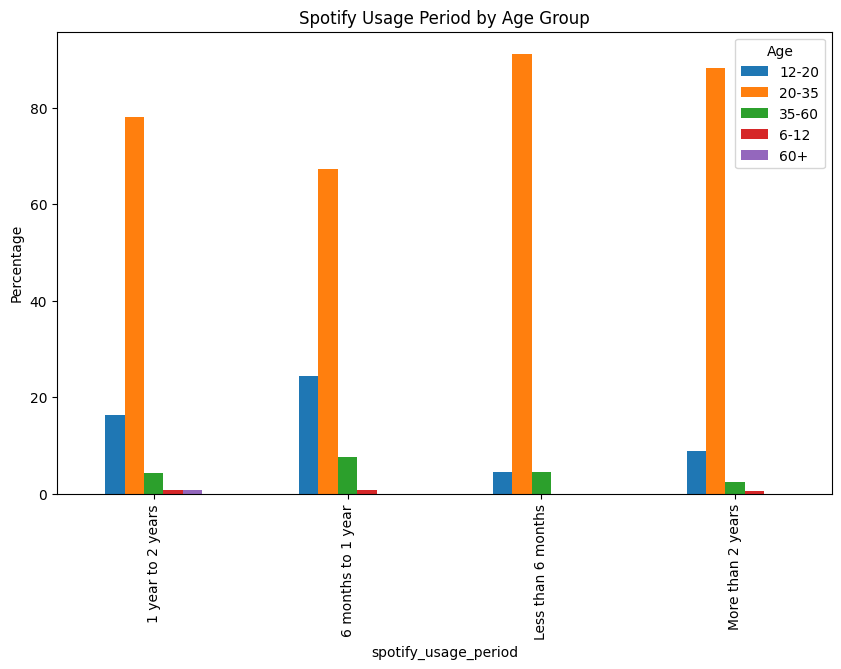

In [62]:
#Analyzing the age groups of users and their spotify usage period

# Group by Age and UsagePeriod and get the counts
age_usage_counts = df.groupby([ 'spotify_usage_period','Age']).size().unstack(fill_value=0)


# Calculate the proportions
age_usage_props = age_usage_counts.divide(age_usage_counts.sum(axis=1), axis=0)

# Convert to percentages
age_usage_props = round(age_usage_props * 100,1)

print(age_usage_props)
# Generate a stacked bar plot with percentages
age_usage_props.plot(kind='bar', stacked=False, figsize=(10,6))
plt.ylabel('Percentage')
plt.title('Spotify Usage Period by Age Group')
plt.show()


Based on the Spotify usage data by age group:

- Among users who have been using Spotify for "1 year to 2 years", 78.0% are in the "20-35" age group, followed by 16.3% in the "12-20" age group. The "35-60", "6-12", and "60+" age groups make up a smaller proportion of this user category.

- For users with a Spotify usage period of "6 months to 1 year", the "20-35" age group is again the largest, comprising 67.2% of these users. However, the "12-20" age group makes up a larger proportion in this category compared to the "1 year to 2 years" category, indicating that more recent Spotify adopters are likely to be younger.

- Users who have been using Spotify for "Less than 6 months" are predominantly in the "20-35" age group (91.2%). Only a small proportion are in the "12-20" and "35-60" age groups, and none are in the "6-12" and "60+" age groups. This suggests that Spotify's most recent adopters are primarily young adults.

- Among the users who have been using Spotify for "More than 2 years", the vast majority are also in the "20-35" age group (88.2%), with only a small number in the "12-20" and "35-60" age groups. Almost no users in the "6-12" and "60+" age groups have been using Spotify for more than 2 years.

This data suggests that young adults (ages 20-35) are the most prevalent Spotify users across all usage periods, indicating that this age group has the highest adoption and retention rates. However, there's an increasing trend of younger users (ages 12-20) adopting Spotify, particularly among those who have been using Spotify for less than 2 years. Efforts to attract and retain users in other age groups, particularly the "35-60" and "60+" age groups, may be less successful, as they comprise a small proportion of users across all usage periods.

3    190
4    174
5     86
2     56
1     14
Name: music_recc_rating, dtype: int64


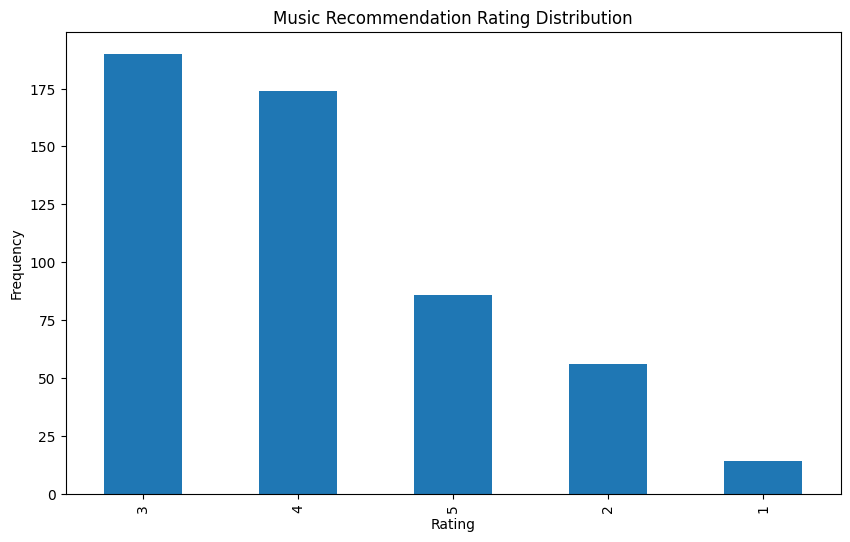

In [68]:
# Count the frequency of each rating
music_rec_rating_count = df['music_recc_rating'].value_counts()

print(music_rec_rating_count)
# Plot the frequencies as a bar chart
music_rec_rating_count.plot(kind='bar', figsize=(10,6))

# Give the chart a title, and label the x and y axes
plt.title('Music Recommendation Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Frequency')

# Display the chart
plt.show()


This data represents how users rate the music recommendation feature of a platform, presumably on a scale from 1 to 5.

- A rating of "3" was the most common among the users, with 190 users giving this rating. This suggests that a majority of the users find the music recommendations to be average or satisfactory.
- The second most common rating is "4", given by 174 users, indicating a significant number of users who are quite satisfied with the music recommendations.
- The rating of "5" was given by 86 users, showing that a smaller, but still notable, group of users are extremely satisfied with the music recommendations.
- A lower rating of "2" was given by 56 users, suggesting some users are not very satisfied with the music recommendations.
- The lowest rating of "1" was given by 14 users, showing that a small fraction of users are very unsatisfied with the music recommendations.

In general, it appears that users are relatively satisfied with the music recommendations, with the majority rating them as 3 or 4. However, there is still room for improvement, as evidenced by the users who gave lower ratings.